In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the root directory
PATH_DIR = Path(r"..\data")

# Define the subdirectories for training and testing data
train_dir = PATH_DIR / "train"
test_dir = PATH_DIR / "test"

# Define the subdirectories for NORMAL and PNEUMONIA images
normal_train_dir = train_dir / "NORMAL"
pneumonia_train_dir = train_dir / "PNEUMONIA"
normal_test_dir = test_dir / "NORMAL"
pneumonia_test_dir = test_dir / "PNEUMONIA"

def get_exact_label(path):
    path = str(path)
    if 'virus' in path:
        return 'virus'
    elif 'bacteria' in path:
        return 'bacteria' 
    else:
        return 'normal'

# Function to read and process images in a directory
def read_images_in_directory(directory):
    image_paths = list(directory.glob("*.jpeg"))  # You may need to adjust the file extension
    print(image_paths)
    images = [Image.open(image_path) for image_path in image_paths]
    exact_labels = [get_exact_label(image_path) for image_path in image_paths]
    return images, exact_labels

# Read and process images in the training and testing directories
normal_train_images, normal_exact_labels = read_images_in_directory(normal_train_dir)
pneumonia_train_images, pneumonia_exact_labels = read_images_in_directory(pneumonia_train_dir)
normal_test_images, _ = read_images_in_directory(normal_test_dir)
pneumonia_test_images, _ = read_images_in_directory(pneumonia_test_dir)


# For displaying the first image in the "NORMAL" training dataset:
normal_train_images[0].show()


[WindowsPath('../data/train/NORMAL/IM-0115-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0117-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0119-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0122-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0125-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0127-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0128-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0129-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0131-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0133-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0135-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0137-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0140-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0141-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0143-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0145-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0147-0001.jpeg'), WindowsPath('../data/train/NORMAL/IM-0149-0001.jpeg'), WindowsPa

In [2]:
normal_exact_labels[0:10]

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

In [3]:
# check if there are any onther labels in normal_exact_labels 
any(['normal' not in label for label in normal_exact_labels])

False

## Check the distribution of classes in the dataset

In [4]:
virus_cases = np.array(['virus' in label for label in pneumonia_exact_labels]).sum()
virus_cases

1345

In [5]:
normal_cases, pneumonia_cases = len(normal_exact_labels), len(pneumonia_exact_labels)
normal_cases, pneumonia_cases

(1341, 3875)

In [6]:
virus_cases/pneumonia_cases

0.3470967741935484

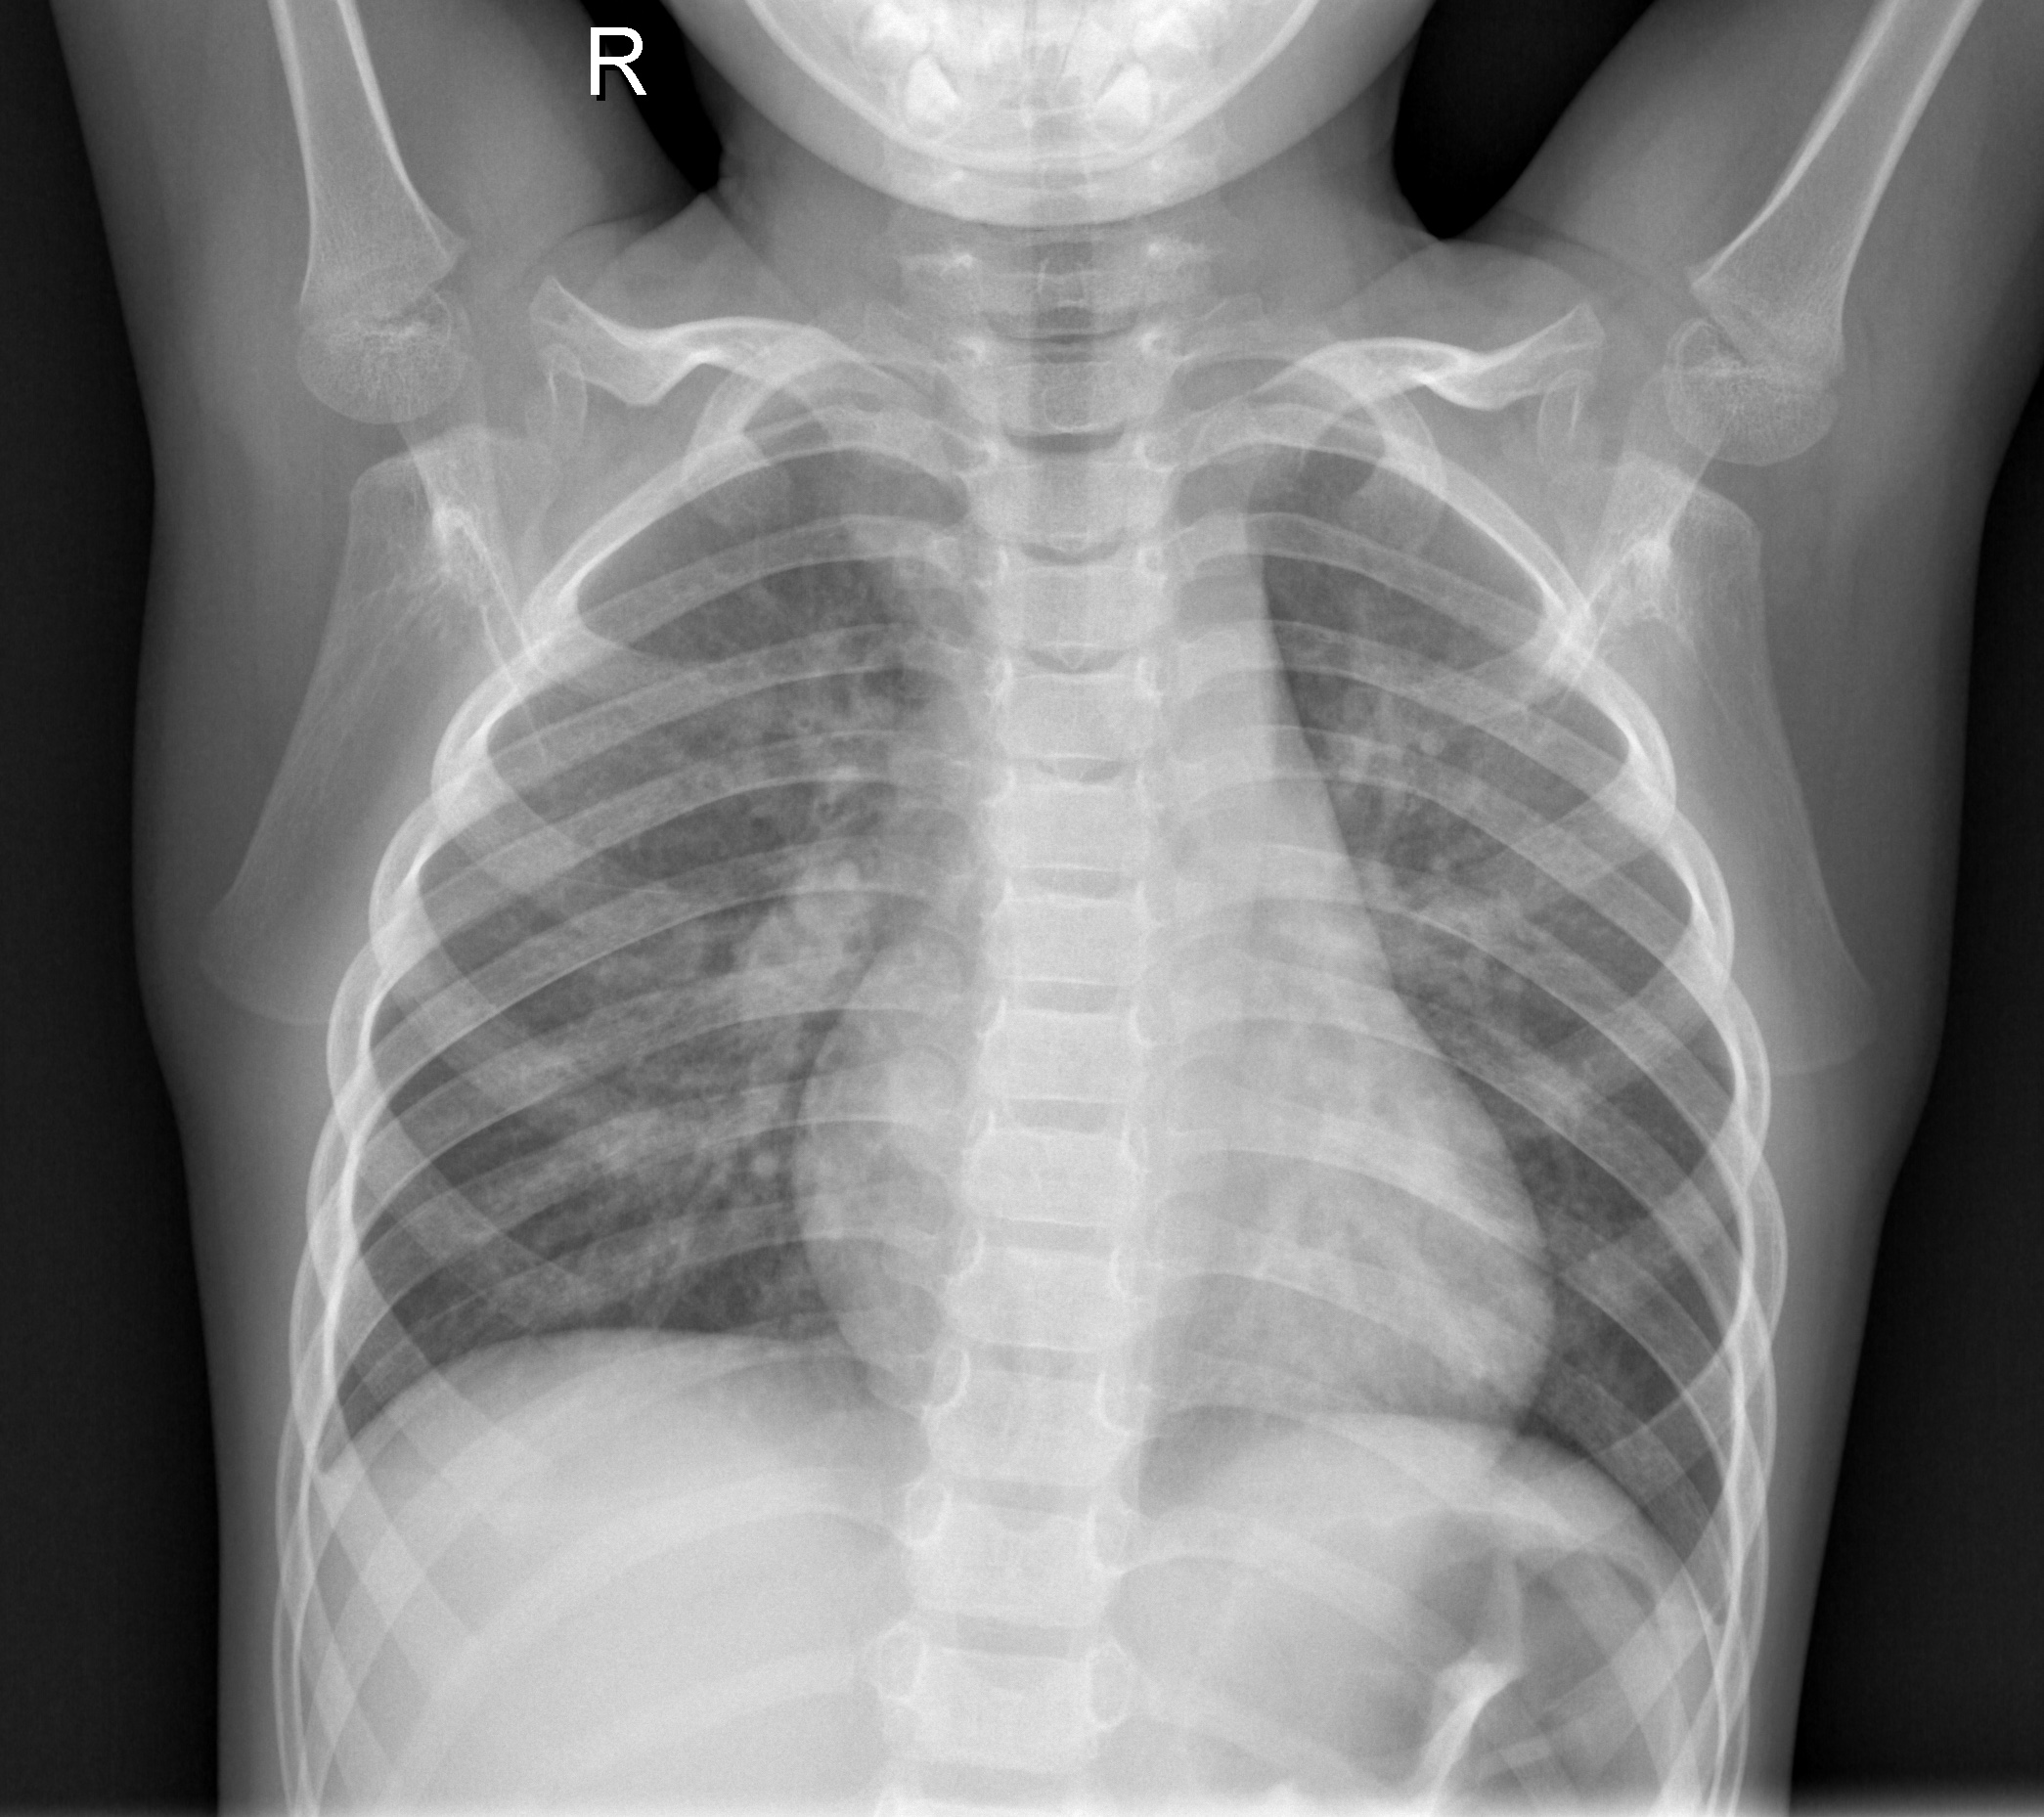

In [7]:
normal_train_images[0]

## Check the sizes of the images

In [8]:
array = np.array(normal_train_images[0])
array.shape

(1858, 2090)

In [9]:
normal_train_images[0].size

(2090, 1858)

In [10]:
# check if the images have different sizes
train_images = [normal_train_images + pneumonia_train_images][0]
any([image.size != normal_train_images[0].size for image in train_images])

True

In [11]:
sizes = np.array([list(image.size) for image in train_images])
sizes[:, 0].max(), sizes[:, 0].min(), sizes[:, 1].max(), sizes[:, 1].min()

(2916, 384, 2663, 127)

(array([ 61.,  20.,  76., 251., 701., 676., 735., 668., 606., 478., 390.,
        256., 133.,  77.,  32.,  22.,  19.,   9.,   3.,   3.]),
 array([ 384. ,  510.6,  637.2,  763.8,  890.4, 1017. , 1143.6, 1270.2,
        1396.8, 1523.4, 1650. , 1776.6, 1903.2, 2029.8, 2156.4, 2283. ,
        2409.6, 2536.2, 2662.8, 2789.4, 2916. ]),
 <BarContainer object of 20 artists>)

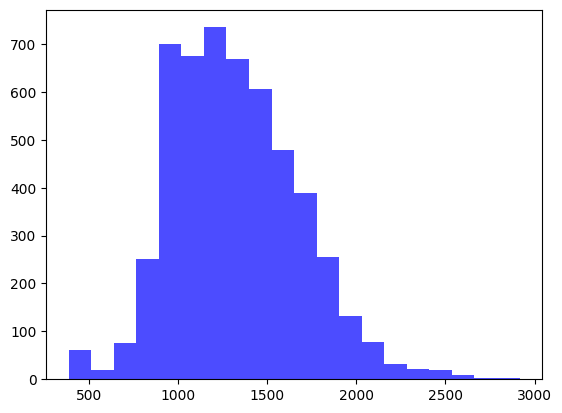

In [12]:
plt.hist(sizes[:, 0], bins=20, color='blue', alpha=0.7)

(array([ 56.,  46., 163., 669., 902., 756., 561., 560., 453., 352., 257.,
        157., 105.,  62.,  50.,  23.,  15.,  12.,   7.,  10.]),
 array([ 127. ,  253.8,  380.6,  507.4,  634.2,  761. ,  887.8, 1014.6,
        1141.4, 1268.2, 1395. , 1521.8, 1648.6, 1775.4, 1902.2, 2029. ,
        2155.8, 2282.6, 2409.4, 2536.2, 2663. ]),
 <BarContainer object of 20 artists>)

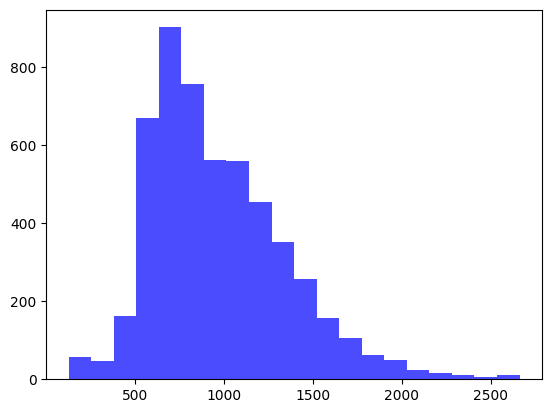

In [13]:
plt.hist(sizes[:, 1], bins=20, color='blue', alpha=0.7)

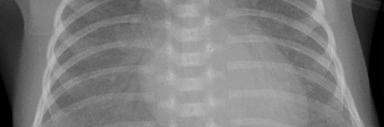

In [14]:
train_images[sizes[:, 0].argmin()]

In [15]:
train_images[sizes[:, 0].argmin()].size

(384, 127)

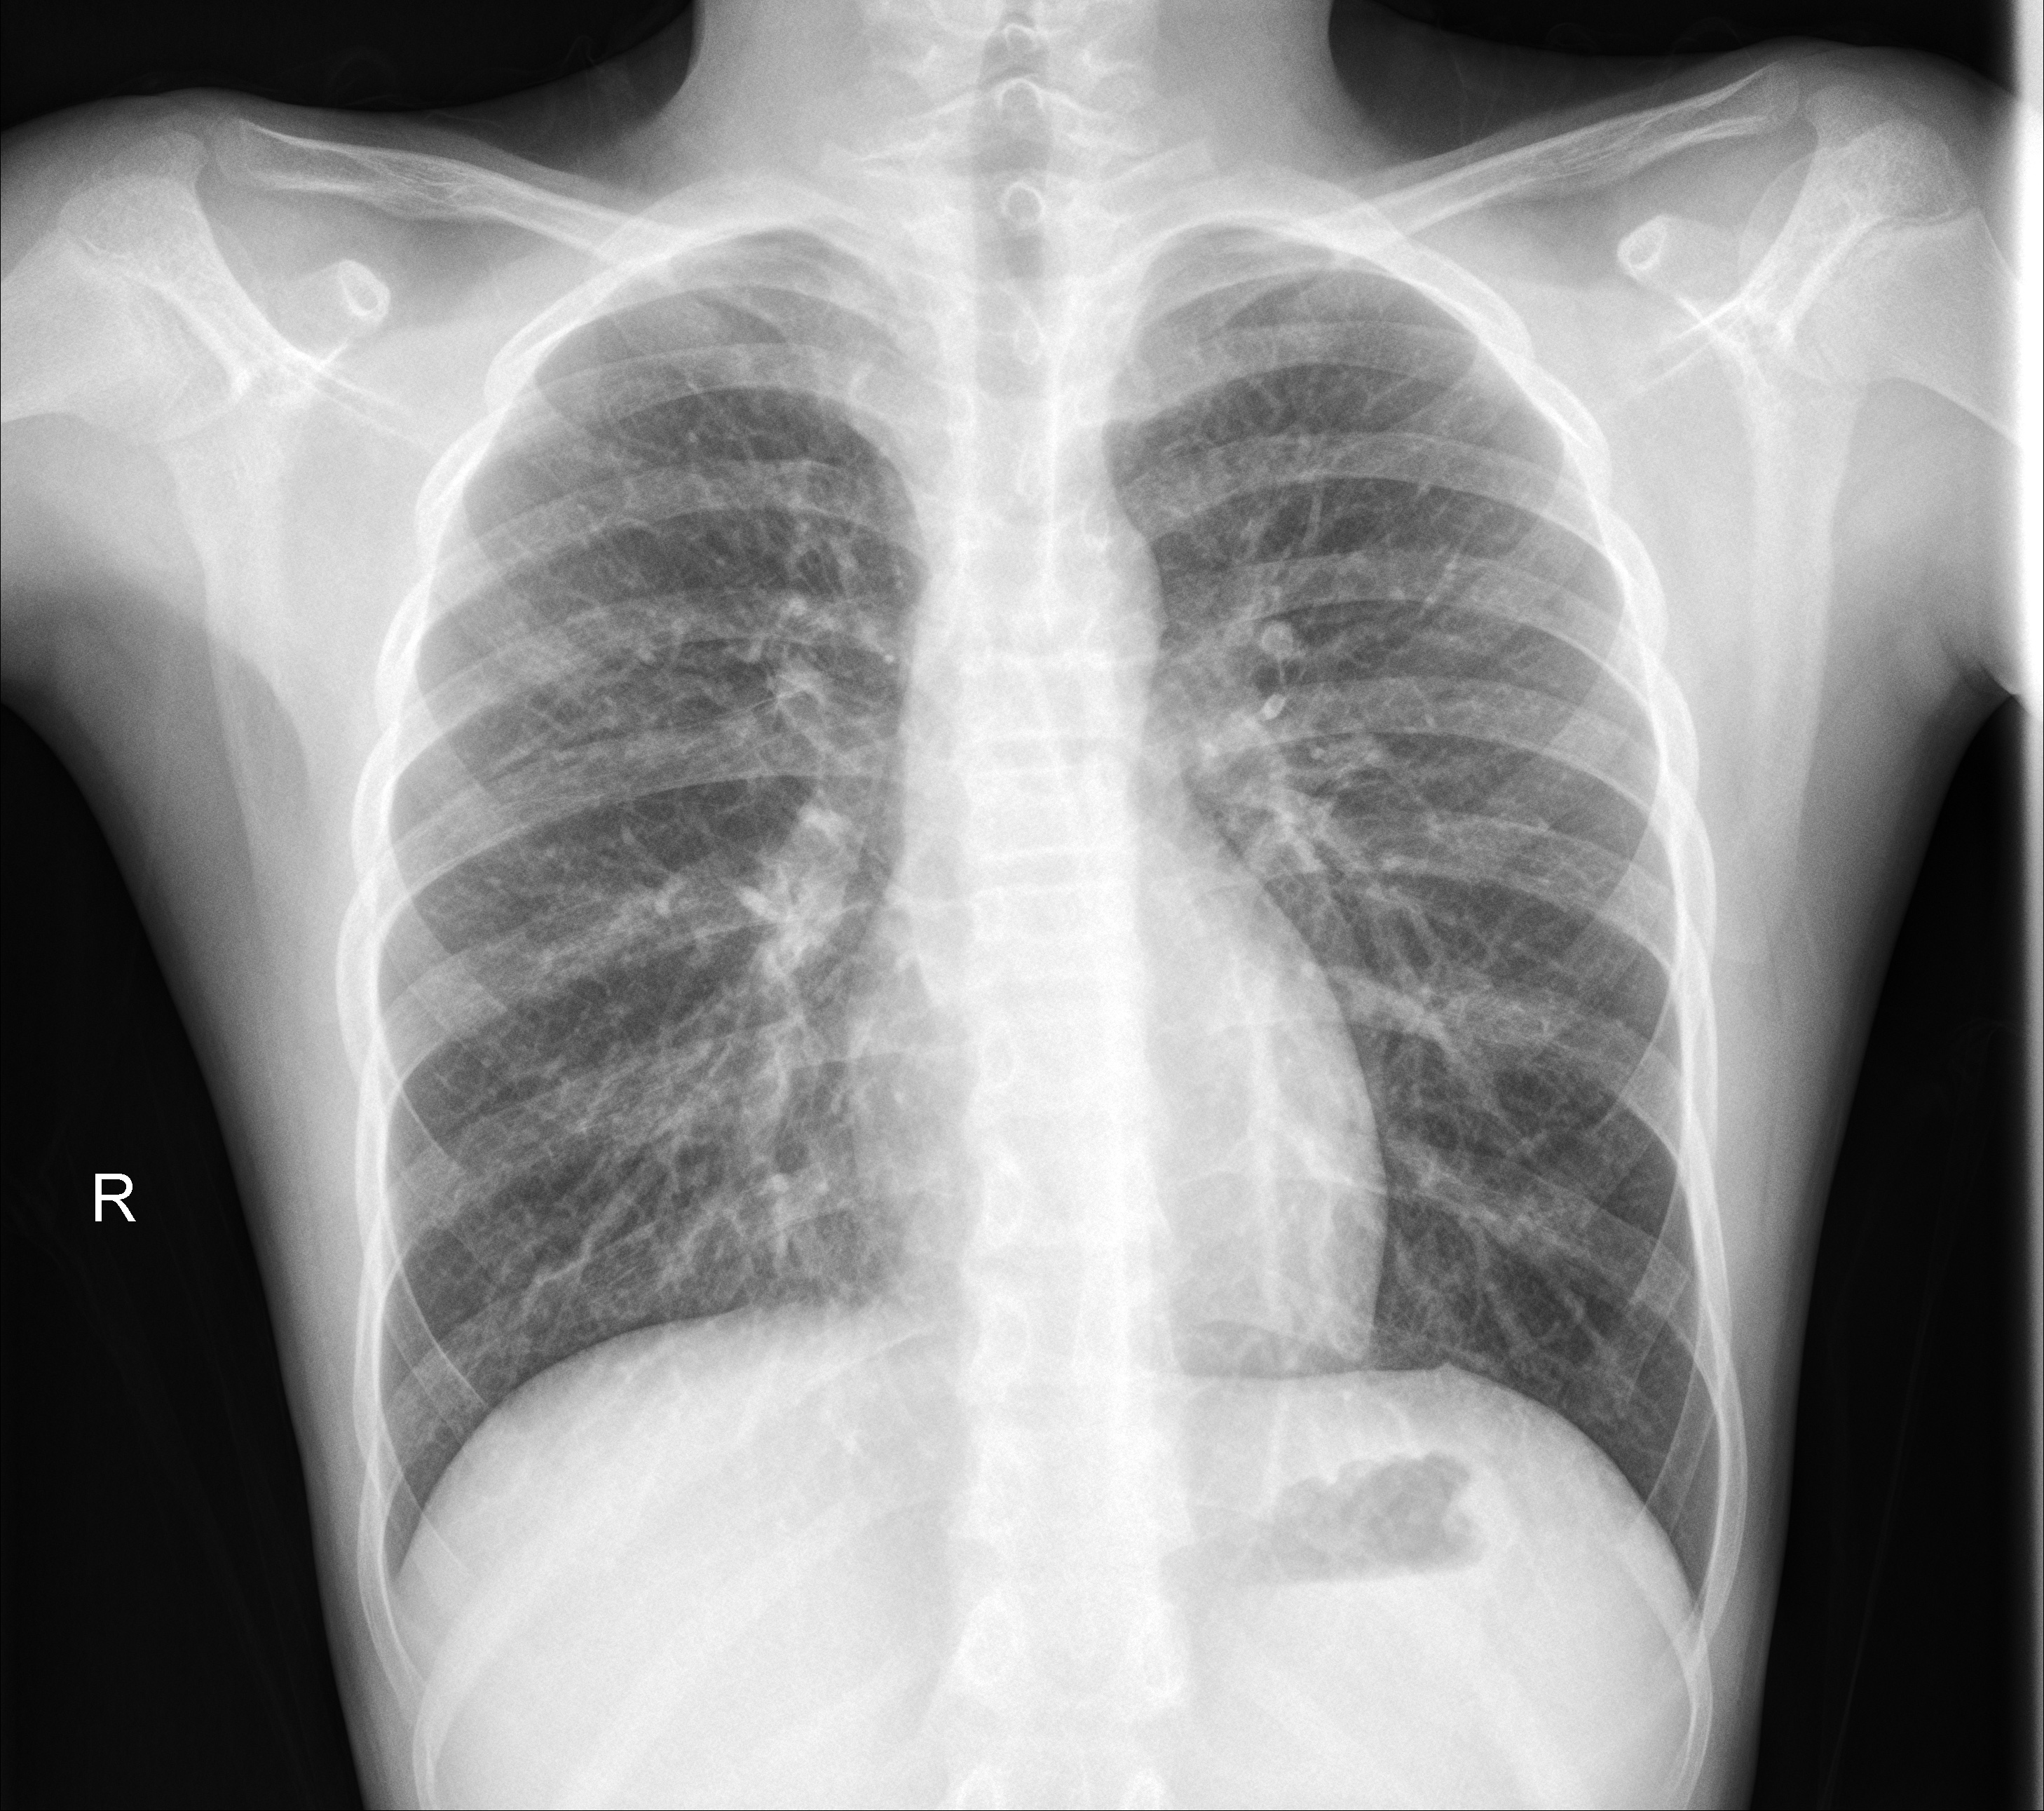

In [16]:
train_images[sizes[:, 0].argmax()]